Импорт необходимых библиотек

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import *
import matplotlib.pyplot as plt

Выделим из наших данных x и y

In [ ]:
# Реальные денежные доходы - y
# Индекс реальных инвестиций в основной капитал - x
data=pd.read_excel('/content/данные.xlsx')
x = data['Индекс реальных инвестиций в основной капитал']
y = data['Реальные     денежные   доходы ']
n = len(x)
x.head()

0    107.5
1    156.2
2    175.6
3    223.7
4     88.2
Name: Индекс реальных инвестиций в основной капитал, dtype: float64

**Метод Зарембки**

Линейная модель

In [ ]:
y_geom_data = np.prod(y) ** (1 / n) # среднее геометрическое по выборке
y_new = y / y_geom_data # пересчитываем новые y_new
X = sm.add_constant(x) # добавляем столбец константы
model1 = sm.OLS(y_new, X) # создается объект модели OLS с зависимой переменной y_new и независимой переменной X
res1 = model1.fit() # модель обучается на данных, подбираются параметры модели
y_pred1 = res1.params[1]*x + res1.params[0] # получаем прогноз значения зависимой переменной на основе второй независимой переменной

ost1 = y - y_pred1
ESS1 = np.sum((y_pred1 - np.mean(y_pred1)) **2 ) # считаем ESS
ESS1

1.1187606030338824

Полученное уравнение:

y^ = 0.0032 * x + 0.5069

Полулогарифмическая модель

In [ ]:
# делаем все то же самое для полулогарифмической модели
X = sm.add_constant(x)
model2= sm.OLS(np.log(y_new), X)
res2 = model2.fit()
y_pred2 = res2.params[1]*x + res2.params[0]

ost2 = y - y_pred2
ESS2 = np.sum((y_pred2 - np.mean(y_pred2))**2)
ESS2

0.9141146156335106

Полученное уравнение:

ln(y)^ = 0.0029 * x - 0.4613

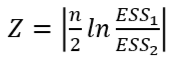

In [ ]:
Z = np.abs((n / 2) * np.log(ESS1 / ESS2)) # считаем статистику z
chi2_kr = chi2.ppf(0.95, df=1) # табличное распределение Хи-квадрат с одной степенью свободы
Z, chi2_kr, Z > chi2_kr # сравниваем статистику z  и табличное распределение Хи-квадрат

(3.6363741027741416, 3.841458820694124, False)

Линейная модель лучше, так как z < chi_tbl, значит отсутствует статистически значимая разница между моделями.

**Метод Бокса-Кокса**

In [ ]:
lamda = np.arange(0.001, 1, 0.01) # список из разных возможных значений для λ
ess_lst=[] # пустой список для сохранения ESS моделей с разным значением λ
for i in lamda: # заполняем список в цикле
  X = sm.add_constant((x**i)/i) # добавляем столбец константы к измененному x
  model2= sm.OLS((y_new**i)/i, X) # создается объект модели OLS с y_new (y / y_geom_data) и X
  res = model2.fit() # модель обучается на данных, подбираются параметры модели
  ess_lst.append(sum(res.resid**2)) # добавляем в список значение ess, с помощью resid находим остатки

In [ ]:
# визуализация зависимости λ от ESS

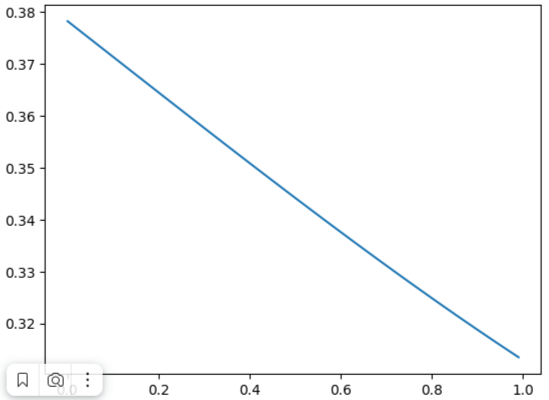

По графику видно, что минимальное значение суммы квадратов остатков ESS, достигается при λ=1.

Следовательно, выбираем линейную функцию.

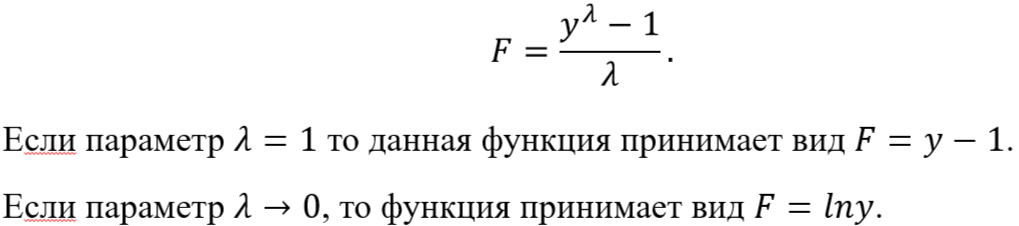

**Критерий Акаике**

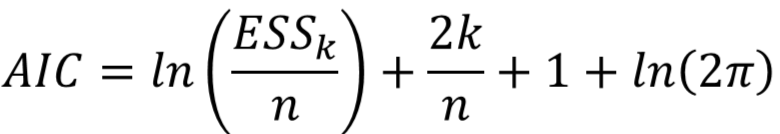

In [ ]:
k = 2

X = sm.add_constant(x) # добавляем столбец константы
model1 = sm.OLS(y, X) # создается объект модели OLS с зависимой переменной y и независимой переменной X
res1 = model1.fit() # модель обучается на данных, подбираются параметры модели
y_pred1 = res1.params[1]*x + res1.params[0] # получаем прогноз значения зависимой переменной на основе второй независимой переменной

ESS1 = np.sum((y_pred1 - np.mean(y_pred1)) **2 ) # считаем ESS
# статистика Акаике
AIC1 = np.log(ESS1/n) + (2*k)/n + 1 + np.log(2*np.pi)
AIC1

10.172758637243835

Полученное уравнение:

y^ = 0.0029 * x - 0.4613

In [ ]:
# делаем все то же самое для полулогарифмической модели
X = sm.add_constant(x)
model2= sm.OLS(np.log(y), X)
res2 = model2.fit()
y_pred2 = res2.params[1]*x + res2.params[0]

ESS2 = np.sum((y_pred2 - np.mean(y_pred2))**2)

AIC2 = np.log(ESS2/n) + (2*k)/n + 1 + np.log(2*np.pi)
AIC2

-0.7243300762889033

Полученное уравнение:

ln(y)^ = 0.0029 * x + 4.8862

AIC2 < AIC1, следовательно, выбираем полулогарифмическую модель.

**Критерий Шварца**

Рассчитывать критерий будем по ESS1 и ESS2 для построенных моделей в прошлом критерии:

y^ = 0.0029 * x - 0.4613, ESS1 = 49379

ln(y)^ = 0.0029 * x + 4.8862, ESS2 = 0.9141

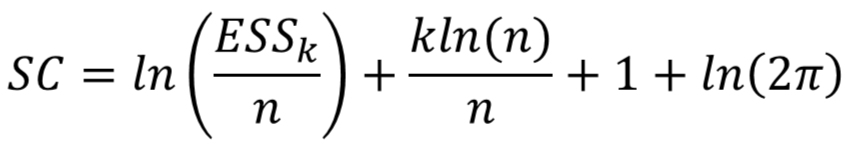

In [ ]:
SC1 = np.log(ESS1/n) + (k*np.log(n))/n + 1 + np.log(2*np.pi)
SC1

10.260731911602509

In [ ]:
SC2 = np.log(ESS2/n) + (k*np.log(n))/n + 1 + np.log(2*np.pi)
SC2

-0.6363568019302308

SC2 < SC1, следовательно, выбираем полулогарифмическую модель.

**Тест Бера и МакАлера**

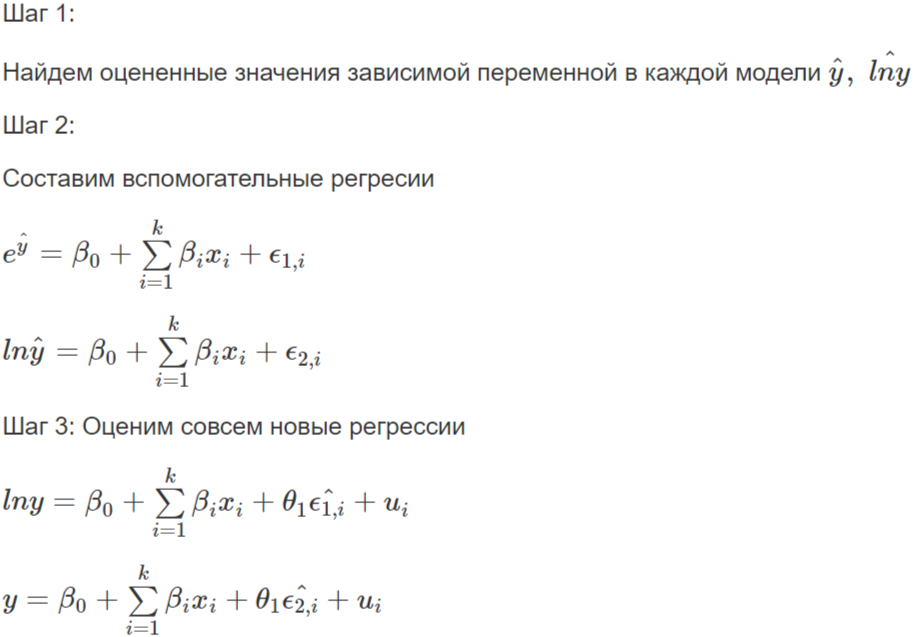

In [ ]:
# Создадим вспомогательную таблицу
df = pd.DataFrame()
df['X'] = x
df['y'] = y
df['ln_y'] = np.log(y)
df['const'] = 1
df.head(3)

,X,y,ln_y,const
0,107.5,164.5,5.102911,1
1,156.2,180.2,5.194067,1
2,175.6,175.5,5.167639,1


Возьмем наши уже просчитанные в критерии Акаике уравнения:

y^ = 0.0029 * x - 0.4613, это y_pred1

ln(y)^ = 0.0029 * x + 4.8862, это y_pred2

In [ ]:
# вычисляем остатки вспомогательных регрессий
ost_1 = sm.OLS(np.exp(y_pred2), df[['const', 'X']]).fit().resid
ost_2 = sm.OLS(np.log(y_pred1), df[['const', 'X']]).fit().resid

# добавляем их в таблицу
df['ost_1'] = ost_1
df['ost_2'] = ost_2

# строим новые регрессии и записываем их t-статистики
pred1 = sm.OLS(np.log(df['y']), df[['const', 'X', 'ost_1']]).fit().tvalues
pred2 = sm.OLS(df['y'], df[['const', 'X', 'ost_2']]).fit().tvalues

df.drop(["ost_1", "ost_2"], axis=1, inplace=True)

p = 2
kr1 = t.ppf(0.95, n-p-1) # находим критическое значение t-статистики из распределения Стьюдента
t_value1 = pred1['ost_1']

p = 2
kr = t.ppf(0.95, n-p-1)
t_value2 = pred2['ost_2']
np.abs(t_value1) > kr, np.abs(t_value2) > kr # сравниваем табличное значение и полученное

(True, True)

Обе статистики значимы, следовательно, тест не подходит для наших данных.

**Тест МакКиннона, Уайта и Дэвидсона**

Возьмем наши уже просчитанные в критерии Акаике уравнения:

y^ = 0.0029 * x - 0.4613, это y_pred1

ln(y)^ = 0.0029 * x + 4.8862, это y_pred2

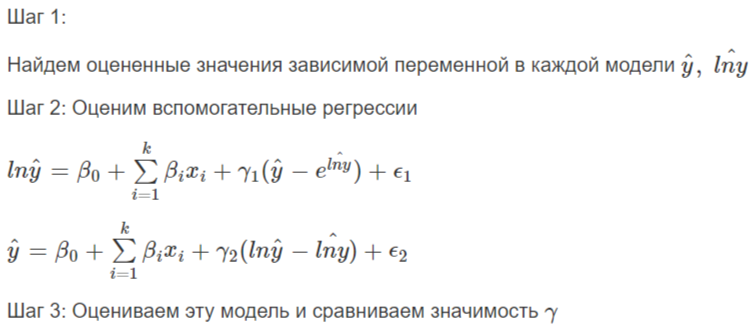

In [ ]:
df["sc1"] = y_pred1 - np.exp(y_pred2)
df["sc2"] = np.log(y_pred1 ) - y_pred2

# строим новые модели и записываем их t-статистики
predict1 = sm.OLS(np.log(y_pred2), df[['const', 'X', 'sc1']]).fit().tvalues
predict2 = sm.OLS(np.log(y_pred2), df[['const', 'X', 'sc2']]).fit().tvalues

p = 2
ttable1 = t.ppf(0.95, n-p-1) # находим критическое значение t-статистики из распределения Стьюдента
t_value1 = predict1['sc1']
t_value1, ttable1, np.abs(t_value1) > ttable1 # сравниваем табличное значение и полученное

# делаем то же самое для второй модели
p = 2
ttable2 = t.ppf(0.95, n-p-1)
t_value2 = predict2['sc2']
np.abs(t_value1) > ttable1, np.abs(t_value2) > ttable2

(True, True)

Обе статистики значимы, следовательно, тест не подходит для наших данных.

**Условия применения:**

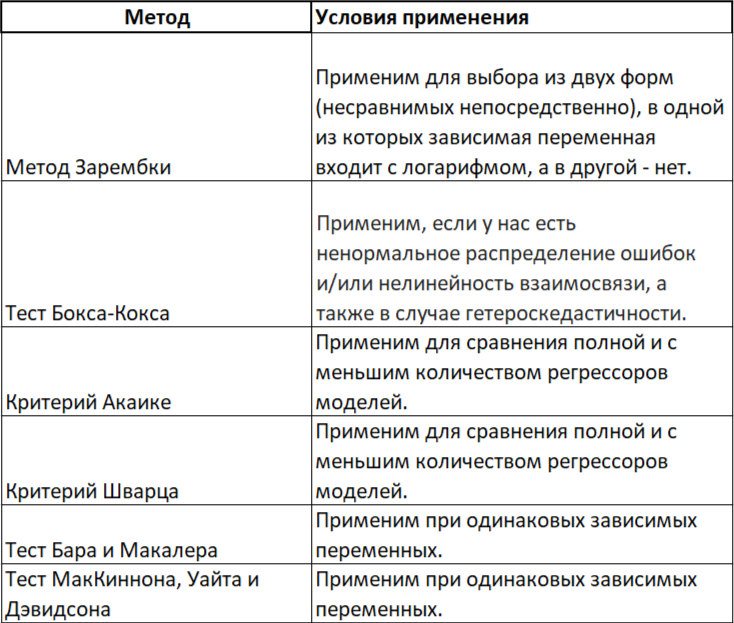

**Вывод:**

По результатам тестов можно сказать, что под данные не подошёл тест Бера-МакАлера и тест МакКиннона, Уайта и Дэвидсона.
По методу Зарембки и Бокса-Кокса линейная модель лучше. Критерий Акаике и Шварца не подхолит по условиям применимости.